# Lecture 5 

## Real world accomplishments of monte carlo simulations 
- monte carlo ray tracing (approximating the rendering equation with monte carlo methods )
- optimization problems (stochastic optimization, portfolio theory, simulations)
- monte carlo localization (for robotics)
- monte carlo tree search (chess, go, strategy games) HW2 EC QUESTION

## What we can calculate with monte carlo simulation (the same problem)
- expected values 
- probabilities 
- integrals 
### Why are those the same problem? 
- (1) expected value = $E[x] = \int_R g(x)f(x) dx$ = integral
- (2) probability of continuous rv = $P(A) = \int_A f(x)dx \int_R I_A(x)f(x) = E(I_A(x))$ = expected value
- note that that I function above is the indicator function
-  (3) Integral = $\int_a^b g(x)dx = (b-a) \int_a^b g(x) \frac{1}{b-a}dx = (b-a)E(g(x)), X \sim Unif(a,b)$ = expected value

## Solving Expected Value problems 

- Let I = E[g(x)] = $\int_{-\infty}^{\infty} g(x)f(x)dx$, why not just use numerical integration

### Numerical integration tangent 
- let's try that using the trapezoid rule: $\int_a^b f(x)dx \approx h/2 (f(x_0) + 2 \sum_{k=0}^{n-1}f(x_k) + f(x_n)) = T_n$
- trapezoidal error: $E = |  \int_a^b f(x)dx - T-ndx |  = \frac{-(b-a) x^2 }{12}f''(\eta) = \frac{-(b-a)^3}{12n^2}f''(\eta): \exists \eta \in (a,b)$
- The Error goes to zero as n increases like $\frac{1}{n^2}$
- we could do better with a better numerical method or with monte carlo methods

### Improving the trapezoidal rule with MC methods 
- Goal: estimate $E[g(x)] = \int_{-\infty}^{\infty}g(x)f(x)dx = I $
- Monte carlo estimate for I: $\hat{I}_{MC} = \frac{1}{n} \sum_{i=1}^n g(X_i)$ where $X_i$ are IID samples of a distribution with pdf f
- How good of an estimator? (unbiased, consistent, small variance)
##### A look at bias 
- first note that this I is a random variable even though its output is an number
- Bias: We want that $E[\hat{I}_{MC}] = I$
- Consitent: We want that $\lim_{n \to \infty}\hat{I}_{MC} \to I$
- Small Variance: low value of $V[\hat{I}_{MC}]$

  
- Thm: $E[\hat{I}_{MC}]$ is an unbiased estimator of I
- Proof: $E[\hat{I}_{MC}] = E[1/n \sum_{i=1}^ng(X_i)] \stackrel{linear}{=} 1/n E[g(X_i)]$
- $= 1/n \sum_{i=1}^n \int_{-\infty}^{\infty}g(x)f(x)dx \stackrel{IID}{=}\int_{-\infty}^{\infty}g(x)f(x)dx $


##### A look at consistency 
- let $Y = g(x), \mu = E[Y], \bar{Y} = \frac{1}{n} \sum_{i=1}^n g(X_i)$
- with law of large numbers $P(\lim_{n \to \infty} \bar{Y} = \mu) =1$

##### Why do we care about variance here? 
- first a quick ex: $\int_0^2 sin(x^2)dx \implies I = 2 \int_0^2 sin(x^2) \frac{1}{2}dx = 2 E[sin(X^2)), X \sim Unif(0, 2) $
- $\implies \hat{I}_{MC} = \frac{2}{n} \sum_{i=1}^n sin(X_i^2), X_i$ are IID Unif(0,2) RV

Monte Carlo Integral Estimate: 0.8031526549365156


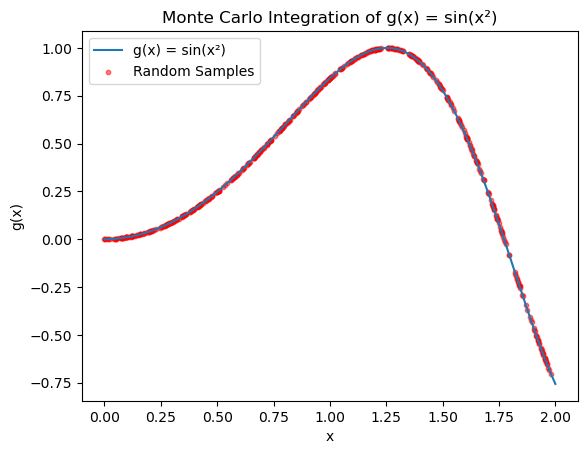

In [16]:
# Variance continued 
import numpy as np
import matplotlib.pyplot as plt
def g(x):
    return np.sin(x**2)
    
a=0
b=2 
n=100000
X = np.random.uniform(a, b, n)
I_mc  = (b-a)/n*np.sum(g(X))

print("Monte Carlo Integral Estimate:", I_mc)

# Plot the function and a subset of the random samples
x_values = np.linspace(a, b, 400)
plt.plot(x_values, g(x_values), label="g(x) = sin(x²)")
plt.scatter(X[:500], g(X[:500]), color='red', s=10, alpha=0.5, label="Random Samples")
plt.xlabel("x")
plt.ylabel("g(x)")
plt.title("Monte Carlo Integration of g(x) = sin(x²)")
plt.legend()
plt.show()

##### Assembling confidence intervals with and without known variance 
- Now we want to assemble a confidence interval based on our $\hat{I}_{MC}$ produced as well as the variance
- $V[\hat{I}_{MC}]=V[\frac{1}{n}\sum_{i=1}^n g(X_i)] = \frac{1}{n^2} V[\sum_{i=1}^n g(X_i)] \stackrel{IID}{=} \frac{1}{n^2} V[g(X)] = V[g(X)] /n$
- Now we want to use the central limit theorem: for big enough n ($n \geq 30$) $\bar{Y} \sim N(\mu, \frac{V(Y)}{n})$ lecomb uses variance as the parameter for normal rather than SD
- let $Z = \frac{\bar{Y}-\mu}{\sqrt{\frac{v(Y)}{n}}} \implies Z \sim N(0, 1)$
- from here just see week one of math 313, for confidence intervals
- our final formula will be $\hat{I}_{MC} \pm Z_{\frac{\alpha}{2}} \frac{\sqrt{V(g(x))}}{\sqrt{n}}$
- we often don't know variance of g(x) so: $V(g(x)) \approx \frac{1}{n-1} \sum_{i=1}^n (g(X_i) - \hat{I}_{MC})^2$
- so the radius of convergence is $Z_{\frac{\alpha}{2}} \frac{\sqrt{V(g(x))}}{\sqrt{n}}$
- SO THIS IS WORSE THAN THE TRAPEZOIDAL RULE !!! So we need to improve it next lecture (short answer never use it for a simple integral) 

# Lecture 6 